##Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

##dataset

Montamos Google Drive y cargamos el dataset del banco que contiene la información de la campaña de marketing.

Si la carpeta del proyecto no se encuentra en google drive, se recomienda subir el archivo de datos en el google colab, o escribir la ruta del archivo en el que se encuentre si se emplea otro entorno de ejecución del código.

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
csv_path = '/content/bank-additional-full.csv'
data = pd.read_csv(csv_path, sep=";")

##Análisis exploratorio de los datos

In [ ]:
columnas = data.columns
estructura = data.shape
print("La cantidad de observaciones es: ", estructura[0])
print("La cantidad de variables es: ", estructura[1])
print("Estas variables son: ", columnas)

La cantidad de observaciones es:  41188
La cantidad de variables es:  21
Estas variables son:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
data.dtypes.to_frame()

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


*  (int) **Age**: Edad del cliente.
*  (Category) **Job**: Tipo de trabajo.
*  (Category) **Marital**: estado civil.
*  (Category) **Education**: Nivel de educación del cliente.
*  (Category) **Default**: Si tiene crédito en mora. Si no realizó pagos de deudas que poseía.
*  (Category) **Housing**: Si tiene préstamo de vivienda.
*  (Category) **Loan**: Si tiene préstamo personal.
*  (Category) **Contact**: Tipo de comunicación de contacto.
*  (Category) **Month**: último día de contacto del mes.
*  (Category) **Day of the week**: Último mes de contacto del año.
*  (int)      **Duration**: Duración del último contacto, en segundos.
*  (int)      **Campaign**: Número de contactos realizados durante esta campaña y para este cliente.
*  (int)      **Pdays**: Número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior.
*  (int)      **Previous**: Número de contactos realizados antes de esta campaña y para este cliente.
*  (Category) **Poutcome**: Resultado de la campaña de marketing anterior.
*  (float)   **emp.var.rate**: .
*  (float)    **cons.price.idx**: .
*  (float)    **cons.conf.idx**: .
*  (float)    **euribor3m**: .
*  (float)    **nr.employed**: .
*  (Category) **Y**: El cliente ha suscrito un depósito a plazo o no.      



In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


---

# Exploración

Balanceo de la variable objetivo "y"

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


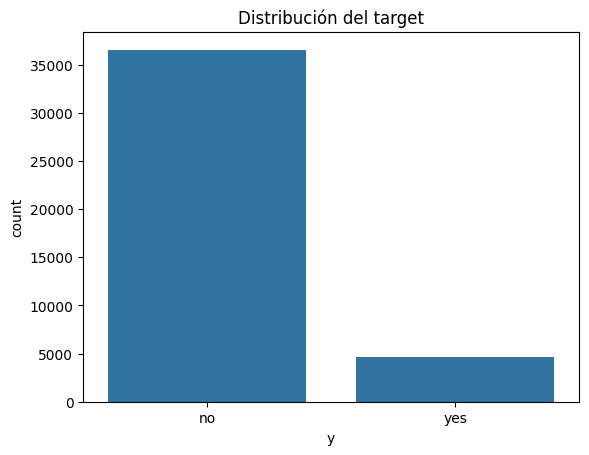

In [ ]:
print(data['y'].value_counts(normalize=True))

sns.countplot(data=data, x='y')
plt.title("Distribución del target")
plt.show()

Distribución variables numericas

Análisis de "pdays"
Valores con 999: 39.500

In [ ]:
data["pdays"].value_counts().head()

,count
pdays,
999,39673
3,439
6,412
4,118
9,64


(41188,)
(1515,)


<Axes: >

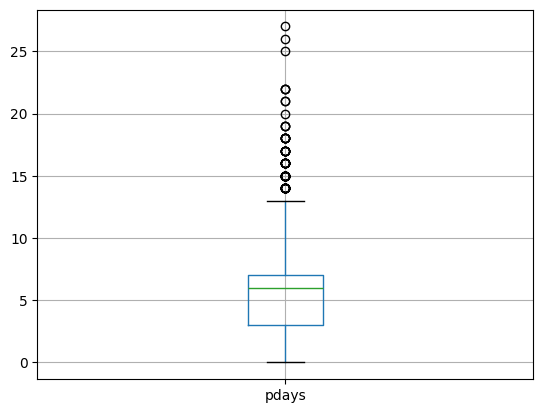

In [ ]:
pdays2 = data[data["pdays"] != 999]
print(data["pdays"].shape)
print(pdays2["pdays"].shape)
pdays2.boxplot("pdays")

<Axes: >

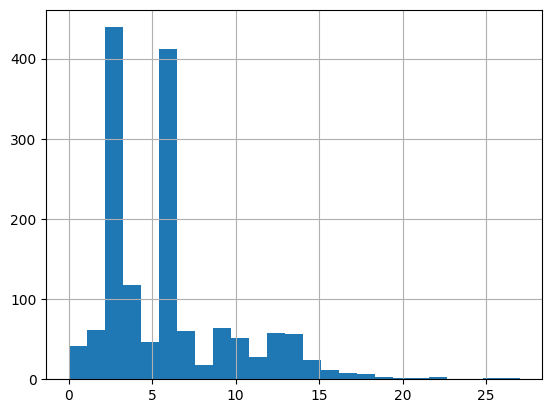

In [ ]:
pdays2["pdays"].hist(bins=25)

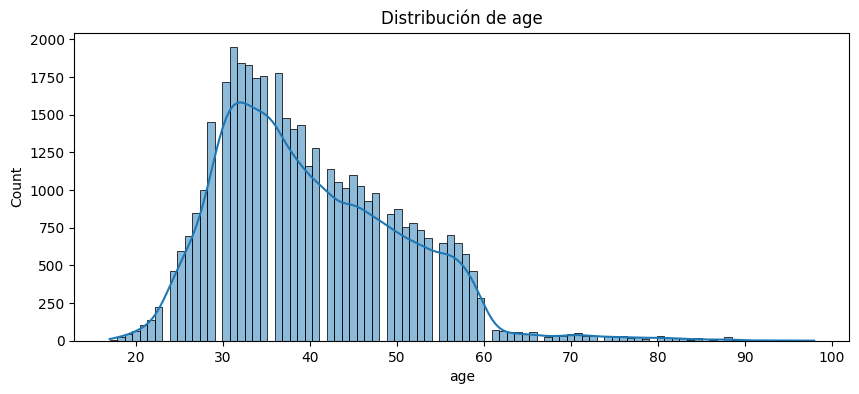

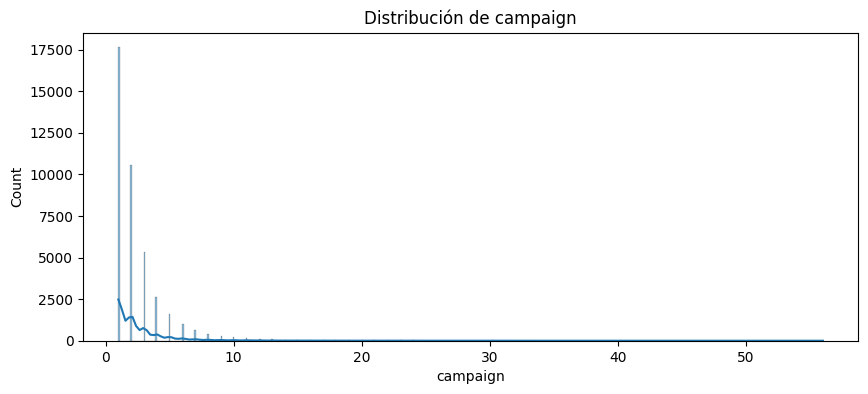

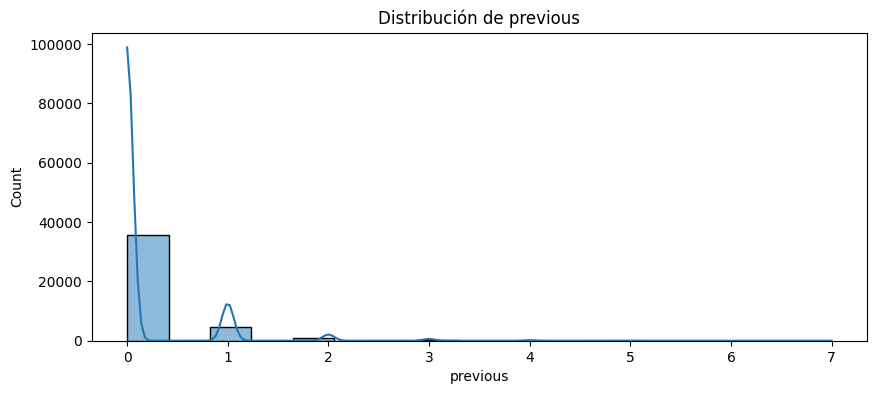

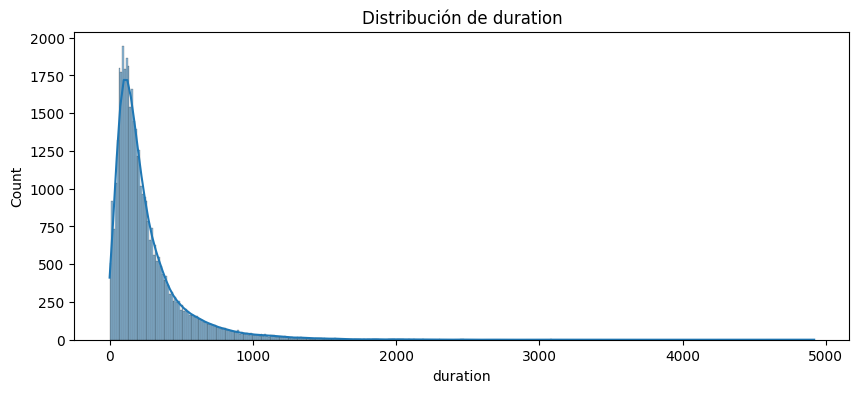

In [ ]:
num_vars = ['age', 'campaign', 'previous', 'duration']

for col in num_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


distribucion variables categoricas

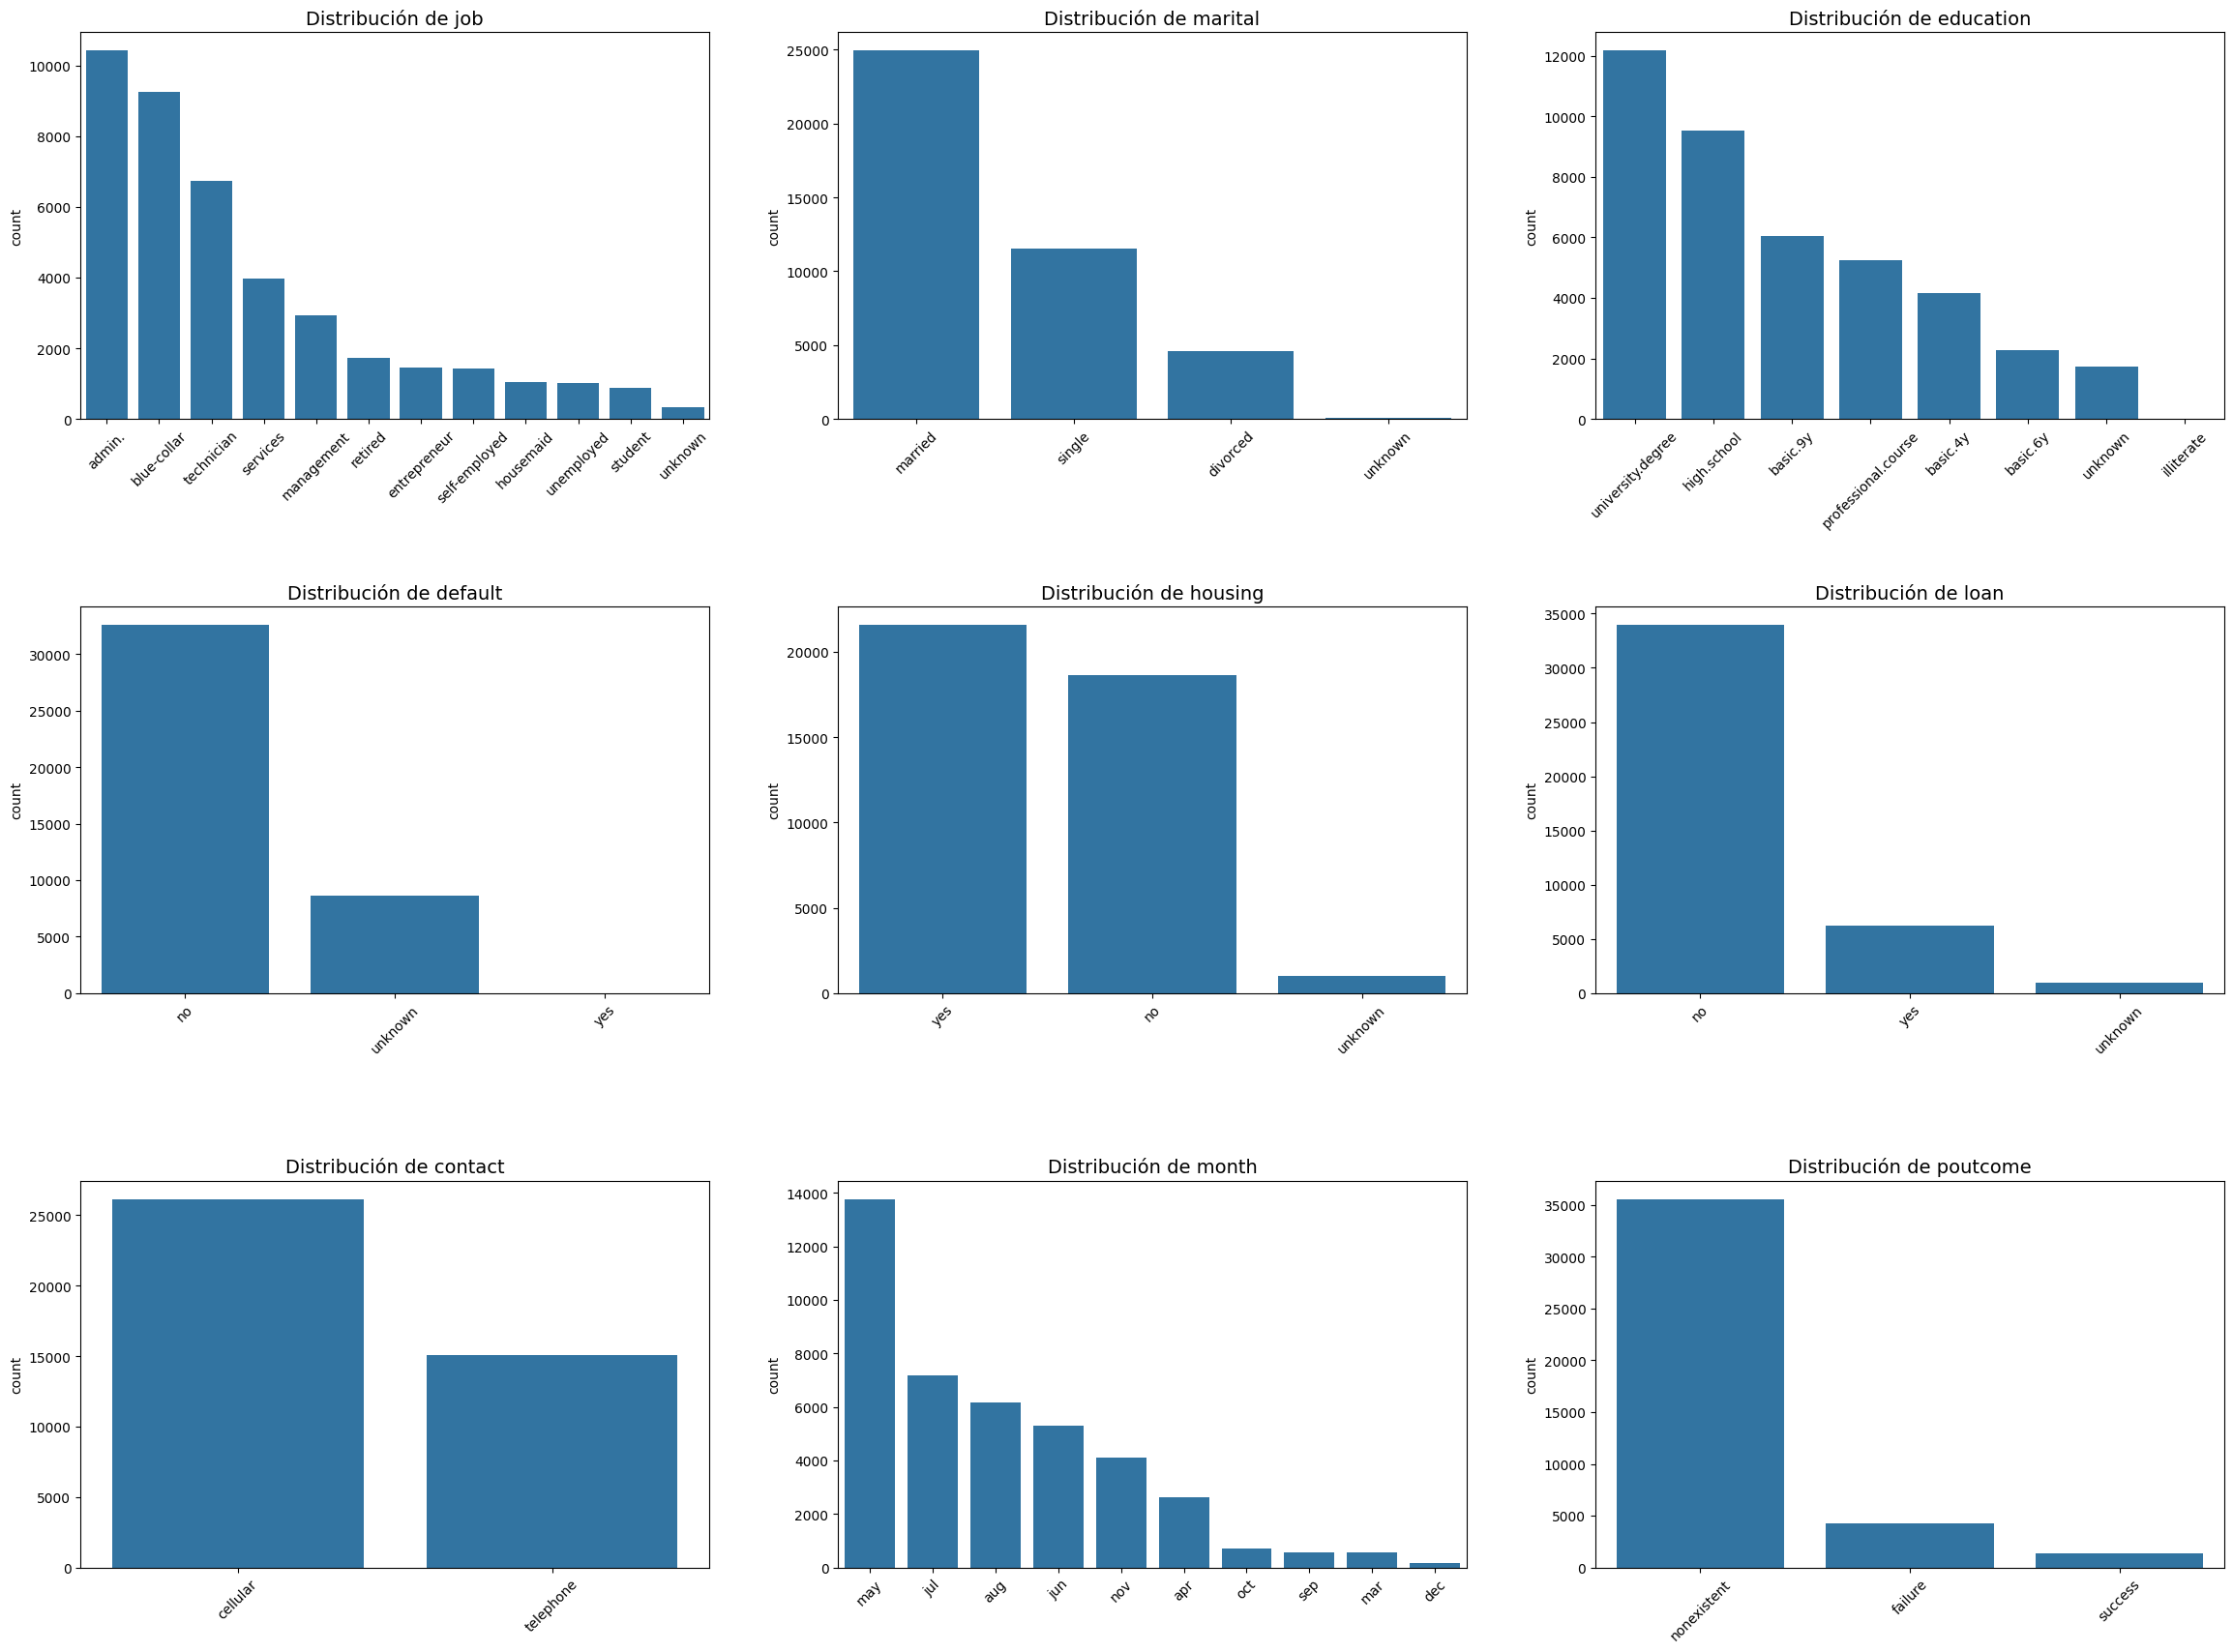

In [ ]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Configurar figura grande con subgráficos
fig = plt.figure(figsize=(24, 18), dpi=100)  # Tamaño grande y alta resolución

for i, col in enumerate(cat_vars, 1):
    ax = fig.add_subplot(3, 3, i)  # 3 filas, 3 columnas
    sns.countplot(
        data=data,
        x=col,
        order=data[col].value_counts().index,
        ax=ax
    )
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Distribución de {col}', fontsize=14)
    ax.set_xlabel('')

plt.tight_layout(pad=4.0)  # Espacio adicional entre gráficos
plt.savefig('categorical_distributions.png', bbox_inches='tight')  # Guardar como imagen
plt.show()

boxplots para ver variables con outliers

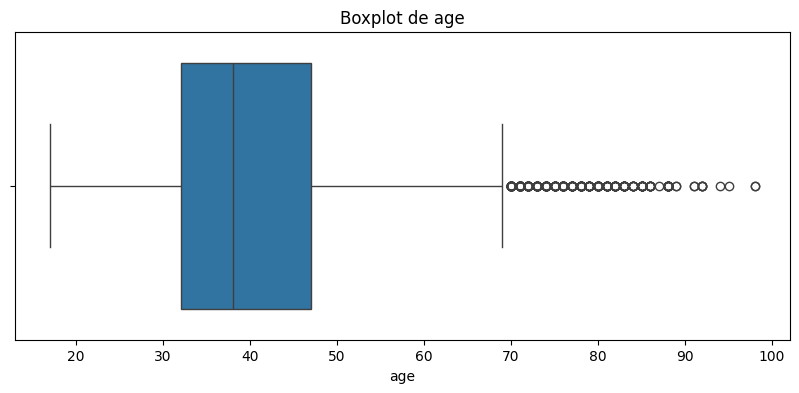

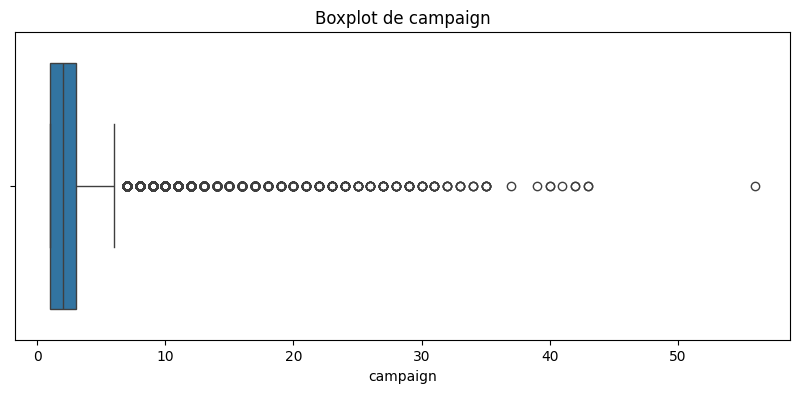

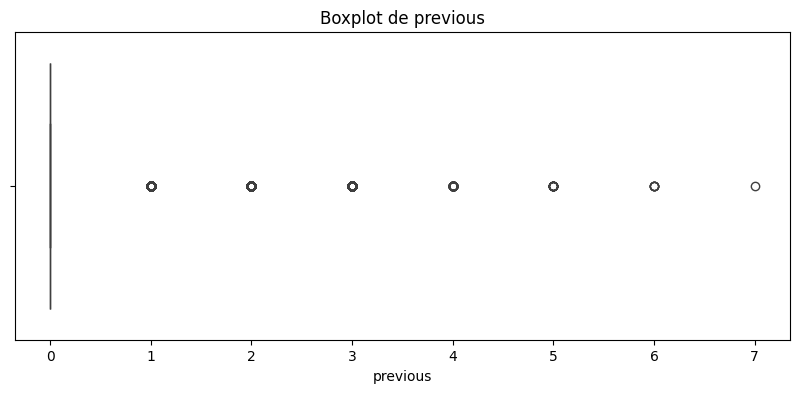

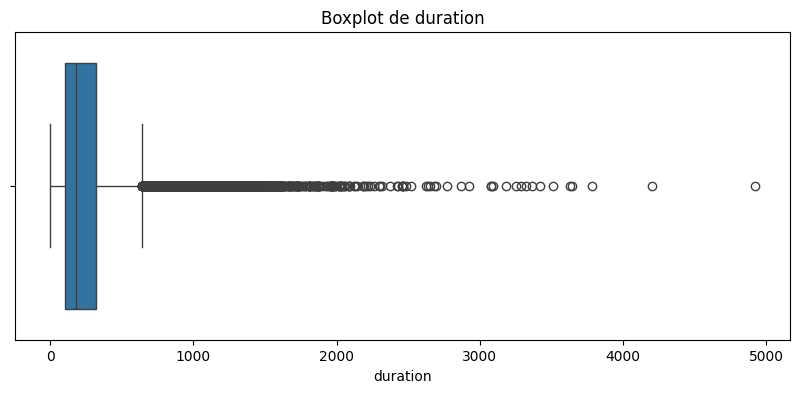

In [ ]:
for col in num_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

---